In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import random
from tqdm import tqdm

In [15]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')


$$P(|X - \mu| > k\sigma) \leq \frac{1}{k^2}$$

In [3]:
# using chi-square distribution
df = 2
mu = df
sigma = np.sqrt(mu)
# creating a chi-square population of size n
n = 100000
s = np.random.chisquare(df, size = n)

In [6]:
# take a random sample from the population 
sample_size = 10000
assert n >= sample_size
rs = random.choices(s, k = sample_size)

In [13]:
# count the sample that is k standard deviations away from the mean centered sample
# set k
ks = [0.1,0.5,1.0,1.5,2.0,2.5,3.0]
# prob list
probs = []

for k in tqdm(ks):
    c = 0
    for i in rs:
        if abs(i - mu) > k * sigma:
            c+=1
    probs.append(c/sample_size)

100%|██████████| 7/7 [00:00<00:00, 198.24it/s]


In [14]:
probs

[0.9463, 0.735, 0.4277, 0.1296, 0.0918, 0.0645, 0.0416]

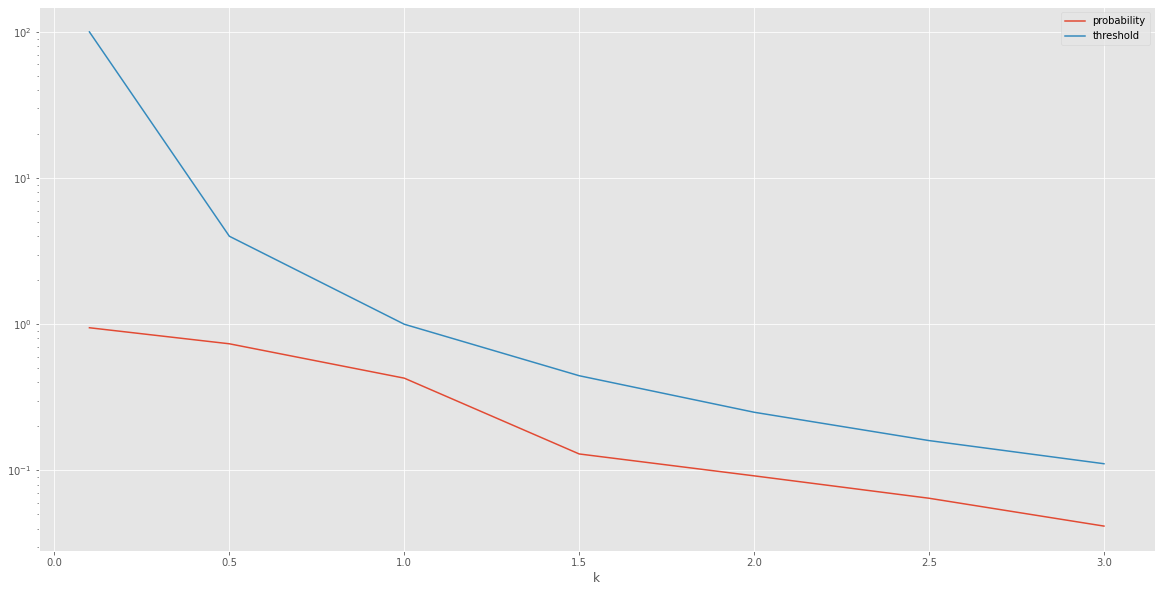

In [19]:
plt.figure(figsize=(20,10))
plt.plot(ks, probs, label = 'probability')
plt.plot(ks, [1/(k**2) for k in ks], label = 'threshold')
plt.xlabel('k')
plt.yscale('log')
plt.legend()
plt.show()